In [42]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from netgraph import Graph
import networkx as nx
from itertools import combinations
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'netgraph'

In [43]:
# Define the LSE colour
LSE_RED = '#ed1c2e'

### Define the URLs of the pages we will be scraping

In [44]:
dma_url = "https://www.lse.ac.uk/Mathematics/Research/Discrete-Mathematics-and-Algorithms"
fin_url = "https://www.lse.ac.uk/Mathematics/Research/Financial-Mathematics-and-Control-Theory"
game_url = "https://www.lse.ac.uk/Mathematics/Research/Game-Theory"
or_url = "https://www.lse.ac.uk/Mathematics/Research/Operations-Research"

### Create a function to help us scrape a url and return a list of professors
* `DMA` : Discrete Maths and Algorithms
* `FIN` : Financial Maths
* `GAME` : Game Theory
* `OR` : Operational Research

In [45]:
def get_professors(url):
    
    r = requests.get(url)
    soup = BeautifulSoup(r.content, 'lxml')
    div = soup.find('div', class_ = "pageContent pageContent--std")
    # Find all headers
    profs = div.find_all('a')
    #return profs
    
    # Extract the text from each header
    profs = [prof.text for prof in profs]
    #return profs
    # Remove the `\xa0` unicode
    profs = [prof.replace('\xa0', ' ') for prof in profs]
    
    # Remove whitespace
    profs = [prof.strip() for prof in profs]
    
    return profs

### Create the 4 lists of professors

In [46]:
dma_profs = get_professors(dma_url)
fin_profs = get_professors(fin_url)
game_profs = get_professors(game_url)
or_profs = get_professors(or_url)

fin_profs

['MPhil and PhD in Mathematics',
 'Dr Christoph Czichowsky',
 'Dr Albina Danilova',
 'Dr Pavel Gapeev',
 '',
 'Dr Arne Lokka',
 'Professor Adam Ostaszewski',
 'Professor Johannes Ruf',
 'Professor Amol Sasane',
 'Professor Luitgard Veraart',
 'Professor Mihail Zervos',
 'Research Students',
 'Jun Cheng',
 'Aron Fulop',
 'Justin Gwee',
 'Zhesheng Liu',
 'Raymond Pang',
 'Yueying Sun',
 'Hengjian Zhang',
 'Yuliang Zhang']

### The lists still require some cleaning

In [48]:
# Clean DMA list
dma_profs.pop(5)
dma_profs = dma_profs[:-8]

In [49]:
# Clean FIN list
fin_profs.pop(0)
fin_profs = fin_profs[:-9]
fin_profs.pop(3)

''

In [50]:
# Clean GAME list
game_profs.pop(2)
game_profs.pop(3)
game_profs.pop(4)
game_profs = game_profs[:-5]

In [51]:
# Clean OR list
for i in range(6):
    or_profs.pop(1)
or_profs = or_profs[:-8]

### Create a graph to show the different clusters
* We will use Netgraph for the visualisation as it looks slighlty nicer than NetworkX
* But we will use NetworkX to find metrics about the network

In [52]:
# Create a list of the 4 areas
areas = ["DMA", "FIN", "OR", "GAME"]

In [53]:
# Create the start of the graph
area_edges = [("Maths", area) for area in areas]

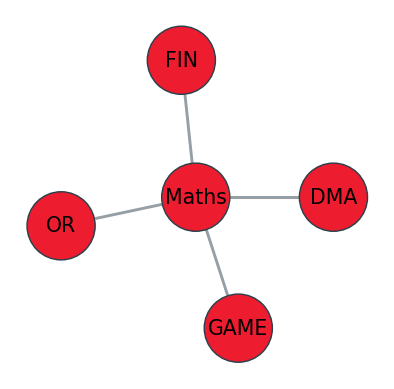

In [12]:
# Initial layout
Graph(area_edges, node_layout='radial', node_size = 12, node_color = LSE_RED, node_labels = True);

### A function to create the edges 

In [54]:
def edges(area, profs):
    edges = [(area, prof) for prof in profs]
    
    return edges

In [14]:
all_profs = dma_profs + fin_profs + game_profs + or_profs

### A bit of cleaning

In [55]:
# Check for duplicates (it will make the visualisation look bad)
pd.Series(all_profs).value_counts()

Professor Andrew Lewis-Pye        2
Dr Robert Simon                   2
Professor Peter Allen             1
Dr Arne Lokka                     1
Dr Ahmad Abdi                     1
Professor Bernhard von Stengel    1
Professor Olivier Gossner         1
Dr Galit Ashkenazi-Golan          1
Professor Mihail Zervos           1
Professor Luitgard Veraart        1
Professor Amol Sasane             1
Professor Johannes Ruf            1
Professor Adam Ostaszewski        1
Dr Pavel Gapeev                   1
Professor Martin Anthony          1
Dr Albina Danilova                1
Dr Christoph Czichowsky           1
Professor Konrad Swanepoel        1
Professor Jozef Skokan            1
Dr Emilio Pierro                  1
Professor Graham Brightwell       1
Professor Julia Böttcher          1
Dr Tugkan Batu                    1
Dr Aled Williams                  1
dtype: int64

In [56]:
# Find what areas the dulicates are in
("Dr Robert Simon" in dma_profs, "Dr Robert Simon" in fin_profs, \
"Dr Robert Simon" in game_profs, "Dr Robert Simon" in or_profs)

(False, False, True, False)

In [57]:
# Find what areas the dulicates are in
("Professor Andrew Lewis-Pye" in dma_profs, "Professor Andrew Lewis-Pye" in fin_profs, \
"Professor Andrew Lewis-Pye" in game_profs, "Professor Andrew Lewis-Pye" in or_profs)

(False, False, True, False)

In [58]:
# Remove them from the longer list
dma_profs.remove("Dr Robert Simon")
dma_profs.remove("Professor Andrew Lewis-Pye")

ValueError: list.remove(x): x not in list

### Create a list with all the edges to professors

In [59]:
#Create the list of all edges in the graph
prof_edges = edges("DMA", dma_profs) + edges("GAME", game_profs) + \
            edges("FIN", fin_profs) + edges("OR", or_profs)

In [60]:
# Create a list with all edges
all_edges = area_edges + prof_edges

In [61]:
# Colouring the edges
area_colour = {area : 'black' for area in area_edges}
dma_colour = {dma_prof : 'purple' for dma_prof in edges("DMA", dma_profs)}
fin_colour = {fin_prof : 'green' for fin_prof in edges("GAME", game_profs)}
game_colour = {game_prof : 'blue' for game_prof in edges("FIN", fin_profs)}
or_colour = {or_prof : 'gold' for or_prof in edges("OR", or_profs)}
colouring = area_colour | dma_colour | fin_colour | game_colour | or_colour

### Final graph layout

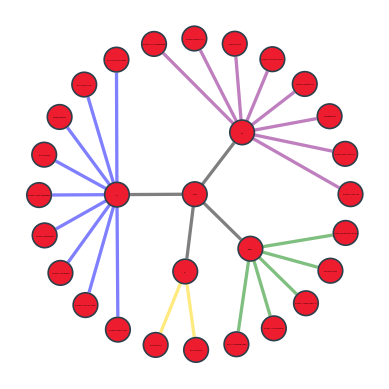

In [22]:
Graph(all_edges, node_layout='radial', node_size = 4, \
      edge_color = colouring, node_color = LSE_RED, node_labels = True);

### Collect the data for interests of professors
* We create a list of lists, where each sub-list has the interests of a professor

In [62]:
def prof_interests(url):

    r = requests.get(url)
    soup = BeautifulSoup(r.content, 'lxml')
    div = soup.find_all('div', class_ = "accordion__txt")
    # Clean the data
    interests = [prof_interests.text for prof_interests in div]
    interests = [prof_interests[1:-2] for prof_interests in interests]
    interests = [prof_interests.replace('\n', '.') for prof_interests in interests]
    interests = [prof_interests.split('.') for prof_interests in interests]
    return interests

In [63]:
prof_interests(fin_url)

[['Financial mathematics; stochastic optimal control; stochastic analysis; optimal portfolio choice; market frictions; transaction costs; shadow prices; duality; mean-variance portfolio optimisation',
  ''],
 ['Financial mathematics; derivative pricing and hedging in incomplete markets and/or under asymmetric information;\xa0 stochastic calculus; stochastic control and optimisation; insider trading; utility maximisation and equilibrium theor'],
 ['Stochastic calculus; optimal stopping and free-boundary problems; pricing of American options; sequential testing and disorder detection problems; interest rate and credit risk models; illiquidity markets; stochastic impulse control and optimisation; Gaussian processes',
  ''],
 ['Probability and financial mathematics; hedging and pricing of derivatives; utility maximisation and equilibrium theory; real investment decisions under uncertaint'],
 ['Mathematical finance; real options and accounting theory; corporate disclosure policy and bargain

### NLP to tokenise the words

In [64]:
import nltk
nltk.download('punkt')

# define a function to tokenize a list of strings
def tokenize(text):
    tokens = []
    for sentence in text:
        tokens.extend(nltk.word_tokenize(sentence.lower()))
    return tokens

[nltk_data] Downloading package punkt to /Users/Goldo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [65]:
# tokenize each sublist in the main list, for each department
tokenized_dma_interests = [tokenize(sublist) for sublist in prof_interests(dma_url)]
tokenized_fin_interests = [tokenize(sublist) for sublist in prof_interests(fin_url)]
tokenized_game_interests = [tokenize(sublist) for sublist in prof_interests(game_url)]
tokenized_or_interests = [tokenize(sublist) for sublist in prof_interests(or_url)]

In [66]:
tokenized_dma_interests

[['extremal',
  'and',
  'probabilistic',
  'combinatorics',
  ';',
  'ramsey',
  'theory',
  ';',
  'graph',
  'and',
  'hypergraph',
  'theory',
  ';',
  'quasirandom',
  'structures',
  ';',
  'algorithmic',
  'combinatoric'],
 ['mathematical',
  'aspects',
  'of',
  'machine',
  'learning',
  ';',
  'probabilistic',
  'modelling',
  'of',
  'learning',
  ';',
  'discrete',
  'mathematical',
  'problems',
  'in',
  'the',
  'theory',
  'of',
  'learning',
  ';',
  'boolean',
  'function',
  'classes',
  'and',
  'their',
  'representation'],
 ['algorithms',
  'and',
  'the',
  'theory',
  'of',
  'computation',
  ';',
  'randomised',
  'algorithms',
  ';',
  'sublinear',
  'algorithms',
  'on',
  'massive',
  'data',
  'sets',
  ';',
  'property',
  'testing',
  ';',
  'computational',
  'statistic'],
 ['extremal',
  'combinatorics',
  ';',
  'random',
  'discrete',
  'structures',
  ';',
  'ramsey',
  'theory',
  ';',
  'regularity',
  'method',
  ';',
  'graph',
  'packing',
  ';'

### Convert the tokenised interests into their stems, and clean the data to keep essential words

In [67]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


nltk.download('stopwords')

def clean_text(text):
    stemmer = PorterStemmer()
    cleaned_text = []
    for words in text:
        # Tokenize words in each sublist
        words = nltk.word_tokenize(' '.join(words))
        # Remove stop words
        words = [word for word in words if word.lower() not in stopwords.words('english')]
        # Perform stemming
        words = [stemmer.stem(word) for word in words]
        # Remove non-alphabetic characters
        words = [word for word in words if word.isalpha()]
        cleaned_text.append(words)
    return cleaned_text

[nltk_data] Downloading package stopwords to /Users/Goldo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [68]:
stems_interests_dma = clean_text(tokenized_dma_interests)
stems_interests_fin = clean_text(tokenized_fin_interests)
stems_interests_game = clean_text(tokenized_game_interests)
stems_interests_or = clean_text(tokenized_or_interests)

In [69]:
# Remove duplicate words per professor's research areas, and non essential words
for i in range(len(stems_interests_dma)):
    stems_interests_dma[i] = list(set(stems_interests_dma[i]))
    
for i in range(len(stems_interests_fin)):
    stems_interests_fin[i] = list(set(stems_interests_fin[i]))
    
for i in range(len(stems_interests_game)):
    stems_interests_game[i] = list(set(stems_interests_game[i]))

for i in range(len(stems_interests_or)):
    stems_interests_or[i] = list(set(stems_interests_or[i]))

In [70]:
stems_interests_dma

[['probabilist',
  'structur',
  'graph',
  'hypergraph',
  'ramsey',
  'algorithm',
  'quasirandom',
  'extrem',
  'combinator',
  'theori'],
 ['class',
  'probabilist',
  'model',
  'aspect',
  'mathemat',
  'represent',
  'machin',
  'boolean',
  'discret',
  'learn',
  'theori',
  'function',
  'problem'],
 ['randomis',
  'statist',
  'set',
  'test',
  'properti',
  'algorithm',
  'data',
  'sublinear',
  'massiv',
  'comput',
  'theori'],
 ['structur',
  'method',
  'aspect',
  'random',
  'graph',
  'ramsey',
  'regular',
  'discret',
  'pack',
  'algorithm',
  'quasirandom',
  'extrem',
  'combinator',
  'theori'],
 ['probabilist',
  'aspect',
  'method',
  'random',
  'graph',
  'set',
  'order',
  'partial',
  'algorithm',
  'structur',
  'combinator',
  'finit'],
 ['matroid',
  'network',
  'aspect',
  'mathemat',
  'assign',
  'applic',
  'graph',
  'frequenc',
  'scienc',
  'algorithm',
  'problem',
  'theori'],
 ['network',
  'distribut',
  'mathemat',
  'system',
  'logi

In [73]:
# This is a bit more automated but then needs manual checking

from collections import Counter

# get the total number of sublists
num_sublists = len(stems_interests_dma)

# flatten the list of lists into a single list
flat_list = [word for sublist in stems_interests_dma for word in sublist]

# count the number of occurrences of each word in the flattened list
word_counts = Counter(flat_list)

# create a new list to store the words that appear at least 1/3 times the amount of sublists
result = []
for word, count in word_counts.items():
    if count >= num_sublists // 3:
        result.append(word)

print(result)

['probabilist', 'structur', 'graph', 'algorithm', 'quasirandom', 'extrem', 'combinator', 'theori', 'aspect', 'mathemat', 'discret', 'set', 'comput', 'method', 'random', 'scienc']


In [38]:
# This is the words I have manually chosen

# Iterate through all sublists for each department, remove non-essential words
words_to_remove = ['graph', 'algorithm', 'extrem', 'theori', 'model', 'mathemat', 'learn', 'problem', 'comput', 'test', 'properti', 'data', 'structur', 'method', 'aspect', 'finit', 'applic', 'assign', 'scienc', 'simpl', 'analysi', 'function', 'game', 'method', 'comput']

stems_interests_dma = [[word for word in sublist if word not in words_to_remove] for sublist in stems_interests_dma]
stems_interests_dma

[['probabilist', 'hypergraph', 'ramsey', 'quasirandom', 'combinator'],
 ['class', 'probabilist', 'represent', 'machin', 'boolean', 'discret'],
 ['randomis', 'statist', 'set', 'sublinear', 'massiv'],
 ['random',
  'ramsey',
  'regular',
  'discret',
  'pack',
  'quasirandom',
  'combinator'],
 ['probabilist', 'random', 'set', 'order', 'partial', 'combinator'],
 ['matroid', 'network', 'frequenc'],
 ['network',
  'distribut',
  'system',
  'logic',
  'random',
  'cryptocurr',
  'discret',
  'complex'],
 ['lie', 'group', 'gener', 'type', 'combinator', 'geometr'],
 ['process',
  'stochast',
  'chao',
  'topolog',
  'ergod',
  'algebra',
  'measur',
  'combinator'],
 ['probabilist',
  'combinatori',
  'theoret',
  'geometri',
  'set',
  'discret',
  'quasirandom',
  'combinator',
  'topic'],
 ['theoret',
  'combinatori',
  'convex',
  'geometri',
  'algebra',
  'discret',
  'combinator']]

## NetworkX Visualisation of each research area

In [61]:
def research_area_graph(prof_list, stems_interests):
    interest_sets = [set(stems_interests[i]) for i in range(len(stems_interests))]
    prof_indices = [i for i in range(len(prof_list))]
    
    Graph = nx.Graph()
    
    for pair in list(combinations(prof_indices, 2)):
        if interest_sets[pair[0]].intersection(interest_sets[pair[1]]) != None:
            Graph.add_edge(prof_list[pair[0]], prof_list[pair[1]])
            
    return Graph #nx.draw(Graph, node_color=LSE_RED, with_labels=True)

### Subplots of the four areas

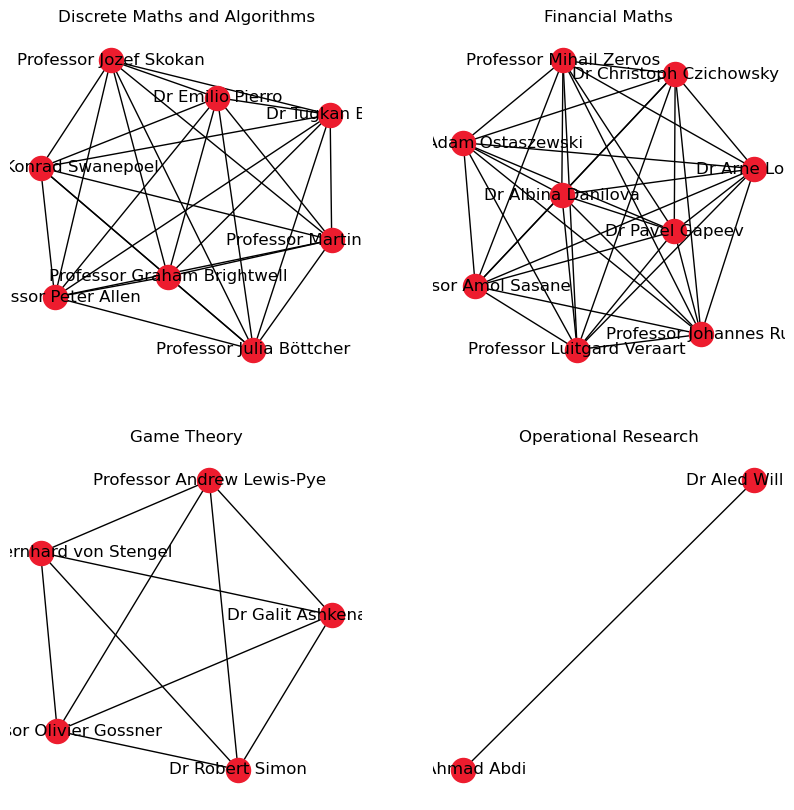

In [67]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

# Draw each graph on a separate subplot
nx.draw(research_area_graph(dma_profs, stems_interests_dma), node_color=LSE_RED, with_labels=True, ax=ax[0, 0])
nx.draw(research_area_graph(fin_profs, stems_interests_fin), node_color=LSE_RED, with_labels=True, ax=ax[0, 1])
nx.draw(research_area_graph(game_profs, stems_interests_game), node_color=LSE_RED, with_labels=True, ax=ax[1, 0])
nx.draw(research_area_graph(or_profs, stems_interests_or), node_color=LSE_RED, with_labels=True, ax=ax[1, 1])

# Set titles
ax[0, 0].set_title('Discrete Maths and Algorithms')
ax[0, 1].set_title('Financial Maths')
ax[1, 0].set_title('Game Theory')
ax[1, 1].set_title('Operational Research')

# Show the plot
plt.show()

### Create a DataFrame
* We will have the professor as a column name
* Then their interests underneath

In [64]:
df = pd.DataFrame(columns = all_profs)

In [65]:
df 

,Professor Peter Allen,Professor Martin Anthony,Dr Tugkan Batu,Professor Julia Böttcher,Professor Graham Brightwell,Professor Andrew Lewis-Pye,Dr Emilio Pierro,Dr Robert Simon,Professor Jozef Skokan,Professor Konrad Swanepoel,...,Professor Amol Sasane,Professor Luitgard Veraart,Professor Mihail Zervos,Dr Galit Ashkenazi-Golan,Professor Olivier Gossner,Professor Andrew Lewis-Pye,Dr Robert Simon,Professor Bernhard von Stengel,Dr Ahmad Abdi,Dr Aled Williams
